**This notebook demonstrates decoherence (energy relaxation)**
$$
   \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
   \newcommand{\ket}[1]{\left|{#1}\right\rangle}
   \newcommand{\bra}[1]{\left\langle{#1}\right|}
$$

Decoherence results in information loss arising from environmental disturbance. Examples of decoherence are:
1. energy relaxation from the excited $\ket{1}$ state to the ground state $\ket{0}$
2. dephasing (which only affects superposition states).

Decoherence causes pure states to become mixed states, which lie inside the Bloch sphere.
The density matrix form of a mixed state $\ket{\psi}$ is given by:
$$
\rho = \ket{\psi}\bra{\psi} = \sum_k p_k \ket{\psi_k}\bra{\psi_k}.
$$

*Example: demonstrate energy relaxtion*
1. Construct a series of circuits, each starting with a single qubit in the excited state (*i.e.* $\ket{1}$)
2. Measure each circuit after increasing amounts of time have elapsed.

In [1]:
import os, sys
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Import local tools
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import backend_tools

# Get a backend (use a real system for this experiment)
IBMQ.load_accounts()
device = backend_tools.get_device(use_sim=False, min_qubits=2)

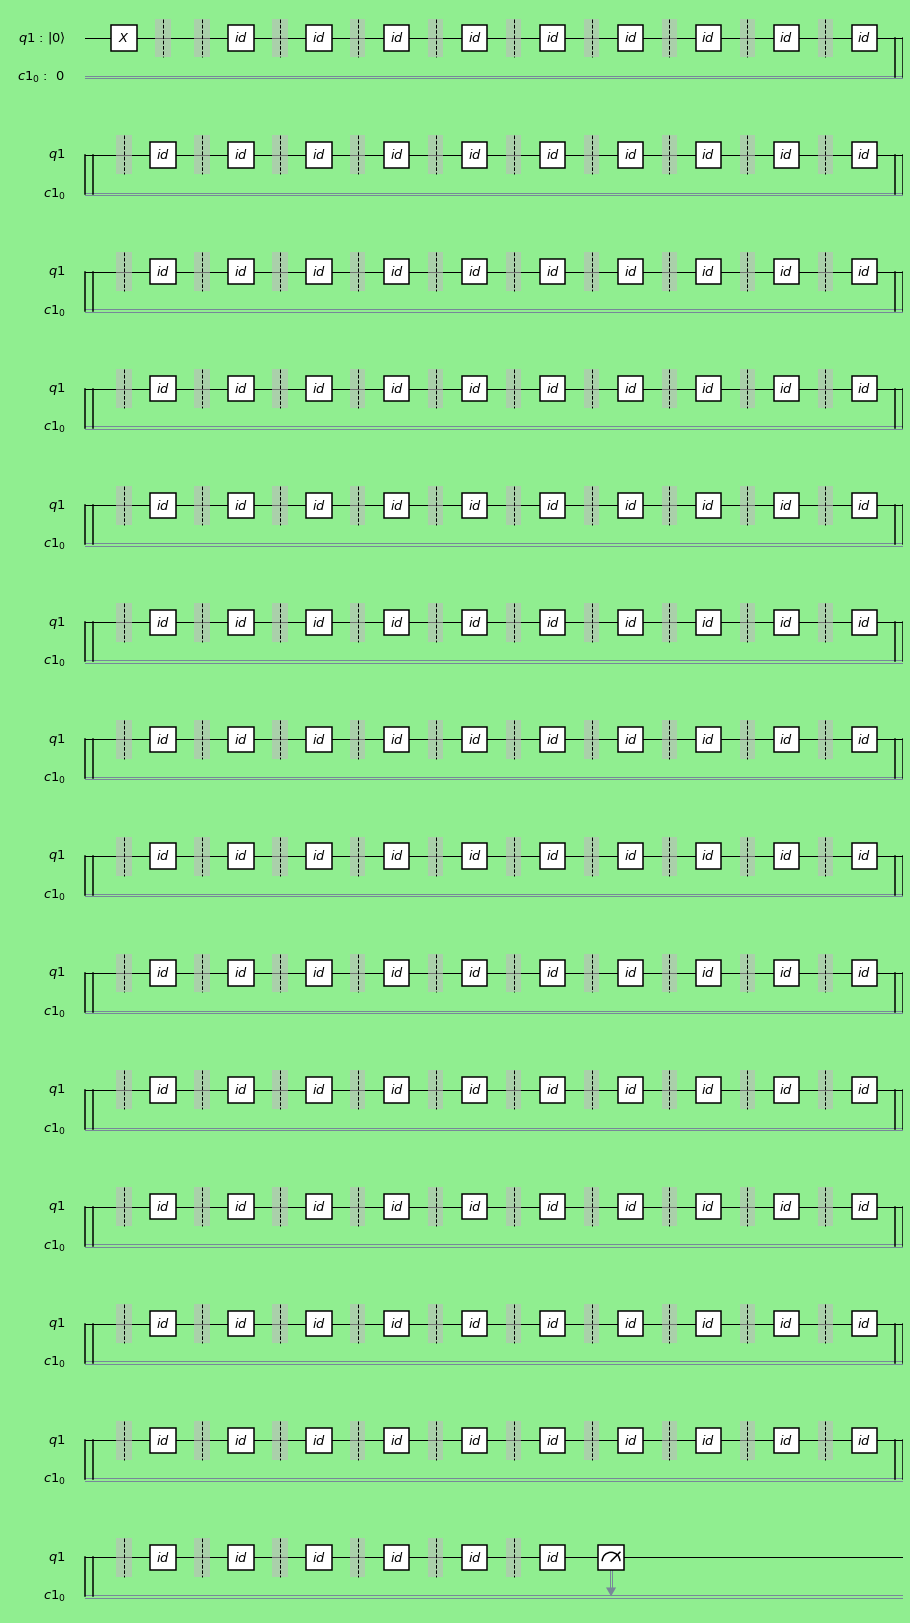

In [4]:
# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuits
pre = QuantumCircuit(q, c)
pre.x(q)
pre.barrier()
meas = QuantumCircuit(q, c)
meas.measure(q, c)
circuits = []
exp_vector = range(1,51)
for exp_index in exp_vector:
    middle = QuantumCircuit(q, c)
    for i in range(45*exp_index):
        middle.barrier(q)
        middle.iden(q)
    circuits.append(pre + middle + meas)
    
# Draw one of the circuits
%matplotlib inline
style = {'backgroundcolor': 'lightgreen'}
circuits[2].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6)

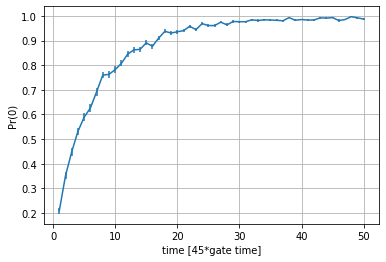

In [5]:
# Execute the circuit
shots = 1024
job = execute(circuits, backend=device, shots=shots, max_credits=10, optimization_level=0)
result = job.result()

# Plot the result
exp_data = []
exp_error = []
for exp_index in exp_vector:
    data = result.get_counts(circuits[exp_index-1])
    try:
        p0 = data['0']/shots
    except KeyError:
        p0 = 0
    exp_data.append(p0)
    exp_error.append(np.sqrt(p0*(1-p0)/shots))

plt.errorbar(exp_vector, exp_data, exp_error)
plt.xlabel('time [45*gate time]')
plt.ylabel('Pr(0)')
plt.grid(True)
plt.show()

The above result shows that as time evolves, the excited state decays to the ground state.